In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

print(os.getcwd())

export_path = "export/"

/Users/kkkzoz/Projects/oreo/benchmarks/cmd/scripts


In [25]:
def extract_segment(file_path):
    match = re.search(r"/([^/]+)_benchmark_results\.csv$", file_path)
    if match:
        return match.group(1)
    return None


def list_csv_files(directory):
    csv_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))
    return csv_files


iot_path = "../data/iot/iot_benchmark_results.csv"
social_path = "../data/social/social_benchmark_results.csv"
order_path = "../data/order/order_benchmark_results.csv"

opt_RMW_path = "../data/opt/RMW_Redis,MongoDB2_benchmark_results.csv"
opt_RW_path = "../data/opt/RW_Redis,MongoDB2_benchmark_results.csv"
opt_RRMW_path = "../data/opt/RRMW_Redis,MongoDB2_benchmark_results.csv"

ycsb_paths = list_csv_files("../data/ycsb/")
print(ycsb_paths)

colors = {
    "softgreen": (184 / 255, 219 / 255, 179 / 255),
    "forestgreen": (114 / 255, 176 / 255, 99 / 255),
    "lightslateblue": (113 / 255, 154 / 255, 172 / 255),
    "orangeyellow": (226 / 255, 145 / 255, 53 / 255),
    "softblue": (148 / 255, 198 / 255, 205 / 255),
    "deepseablue": (74 / 255, 95 / 255, 126 / 255),
}

['../data/ycsb/F_MongoDB1,MongoDB2_benchmark_results.csv', '../data/ycsb/A_MongoDB1,MongoDB2_benchmark_results.csv', '../data/ycsb/F_Redis,Cassandra_benchmark_results.csv', '../data/ycsb/A_Redis,Cassandra_benchmark_results.csv']


In [26]:
def generate_charts(file_path: str, prefix: str) -> None:
    data = pd.read_csv(file_path)
    data["native_throughput"] = data["operation"] / data["native"]
    data["cg_throughput"] = data["operation"] / data["cg"]
    data["oreo_throughput"] = data["operation"] / data["oreo"]
    data["native_oreo_ratio"] = data["native_throughput"] / data["oreo_throughput"]
    data["cg_oreo_ratio"] = data["cg_throughput"] / data["oreo_throughput"]

    # Plot Throughput
    fig, ax1 = plt.subplots()

    line_width = 2
    # 左Y轴显示throughput（折线图）
    ax1.plot(
        data["thread"],
        data["native_throughput"],
        label="native",
        marker="D",
        color=colors["forestgreen"],
        linewidth=line_width,
    )
    ax1.plot(
        data["thread"],
        data["cg_throughput"],
        label="cg",
        marker="o",
        color=colors["lightslateblue"],
        linewidth=line_width,
    )
    ax1.plot(
        data["thread"],
        data["oreo_throughput"],
        label="oreo",
        marker="^",
        markersize=7,
        color=colors["orangeyellow"],
        linewidth=line_width,
    )
    ax1.set_xlabel("Thread")
    ax1.set_ylabel("Throughput")

    # 右Y轴显示比值（柱状图）
    ax2 = ax1.twinx()
    bar_width = 3

    # 计算柱状图的位置
    bar_positions1 = data["thread"] - bar_width / 2
    bar_positions2 = data["thread"] + bar_width / 2

    # 绘制两个柱状图
    bars1 = ax2.bar(
        bar_positions1,
        data["native_oreo_ratio"],
        width=bar_width,
        alpha=0.5,
        color=colors["forestgreen"],
        label="native/oreo",
    )
    bars2 = ax2.bar(
        bar_positions2,
        data["cg_oreo_ratio"],
        width=bar_width,
        alpha=0.5,
        color=colors["lightslateblue"],
        label="cg/oreo",
    )

    # 在柱状图上添加具体数值
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax2.text(
                bar.get_x() + bar.get_width() / 2.0,
                height,
                f"{height:.2f}",
                ha="center",
                va="bottom",
            )

    ax2.set_ylabel("Ratio")
    ax2.set_ylim(0.2, 1.8)

    # 合并两个轴的图例
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    title = f"{prefix}:Throughput vs Thread"
    plt.title(title)
    ax1.grid(True)
    plt.savefig(f"{export_path}/{title}.png")
    plt.show()

    # Plot Latency
    plt.figure()
    plt.plot(
        data["thread"],
        data["native_p99"],
        label="native_p99",
        marker="D",
        color=colors["forestgreen"],
        linewidth=line_width,
    )
    plt.plot(
        data["thread"],
        data["cg_p99"],
        label="cg_p99",
        marker="o",
        color=colors["lightslateblue"],
        linewidth=line_width,
    )
    plt.plot(
        data["thread"],
        data["oreo_p99"],
        label="oreo_p99",
        marker="^",
        ms=7,
        color=colors["orangeyellow"],
        linewidth=line_width,
    )
    plt.xlabel("Thread")
    plt.ylabel("Latency (p99)")
    title = f"{prefix}:Latency (p99) vs Thread"
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{export_path}/{title}.png")
    plt.show()

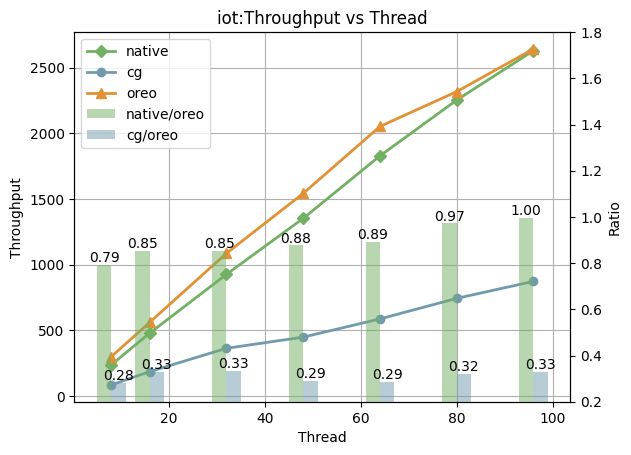

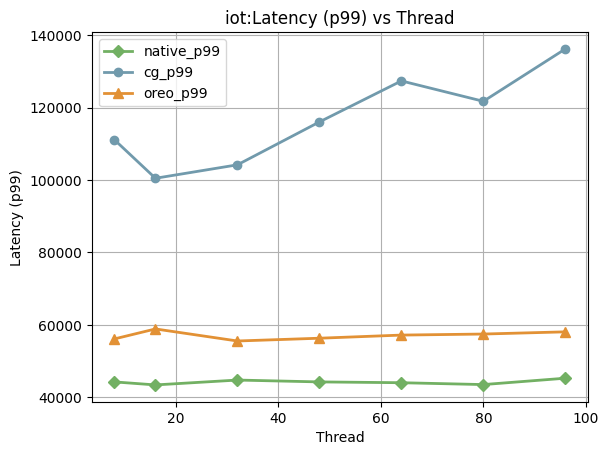

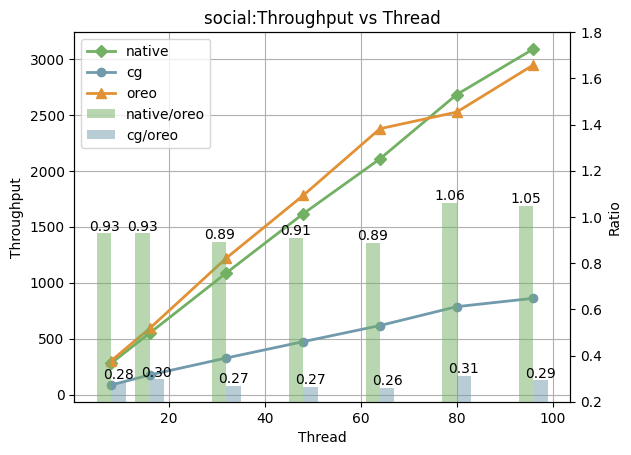

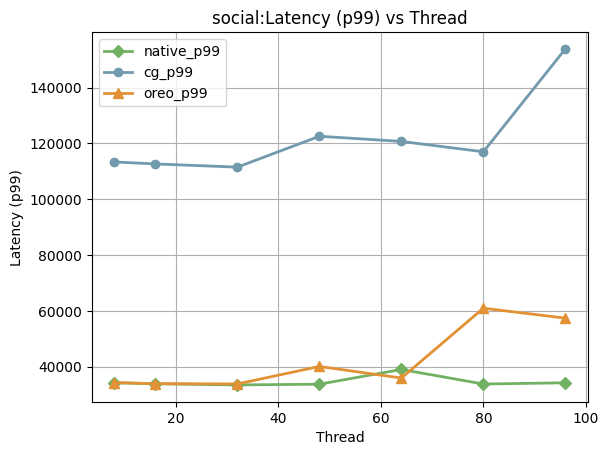

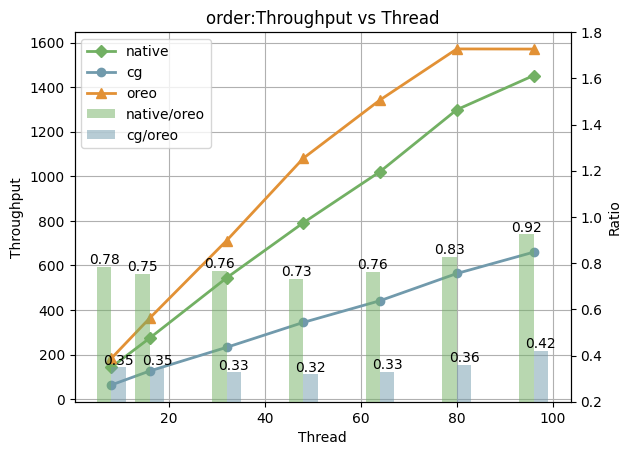

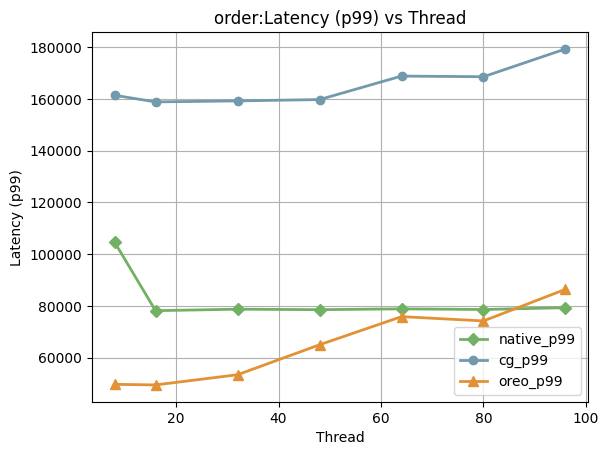

In [27]:
generate_charts(iot_path, "iot")

generate_charts(social_path, "social")

generate_charts(order_path, "order")

In [28]:
def generate_opt_charts(file_path: str, prefix: str,y1_max:any, y2_max:any) -> None:
    # Read CSV data
    data = pd.read_csv(file_path)

    # Calculate throughput
    data["opt1_throughput"] = data["operation"] / data["opt1"]
    data["opt2_throughput"] = data["operation"] / data["opt2"]
    data["opt3_throughput"] = data["operation"] / data["opt3"]
    data["opt4_throughput"] = data["operation"] / data["opt4"]

    # Create figure with shared x axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Create second y-axis sharing same x-axis
    ax2 = ax1.twinx()

    # Plot throughput bar chart on first y-axis
    throughput_data = [
        data["opt1_throughput"].iloc[0],
        data["opt2_throughput"].iloc[0],
        data["opt3_throughput"].iloc[0],
        data["opt4_throughput"].iloc[0],
    ]

    bars = ax1.bar(["opt1", "opt2", "opt3", "opt4"], 
                    throughput_data, color=colors["forestgreen"],width=0.5)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
        
    ax1.set_ylim(0, y1_max)

    # Plot error rate line chart on second y-axis
    error_data = [
        data["opt1_err"].iloc[0],
        data["opt2_err"].iloc[0],
        data["opt3_err"].iloc[0],
        data["opt4_err"].iloc[0],
    ]

    line = ax2.plot(["opt1", "opt2", "opt3", "opt4"], 
                    error_data, color=colors["orangeyellow"], marker="o",linewidth=3)

    # Set labels and title
    ax1.set_ylabel("Throughput(ops)")
    ax2.set_ylabel("Error Rate(%)")
    ax2.set_ylim(0, y2_max)
    
    title = f"{prefix}:Throughput and Error Rate Comparison"
    plt.title(title)

    plt.tight_layout()
    plt.savefig(f"{export_path}/{title}.png")
    plt.show()

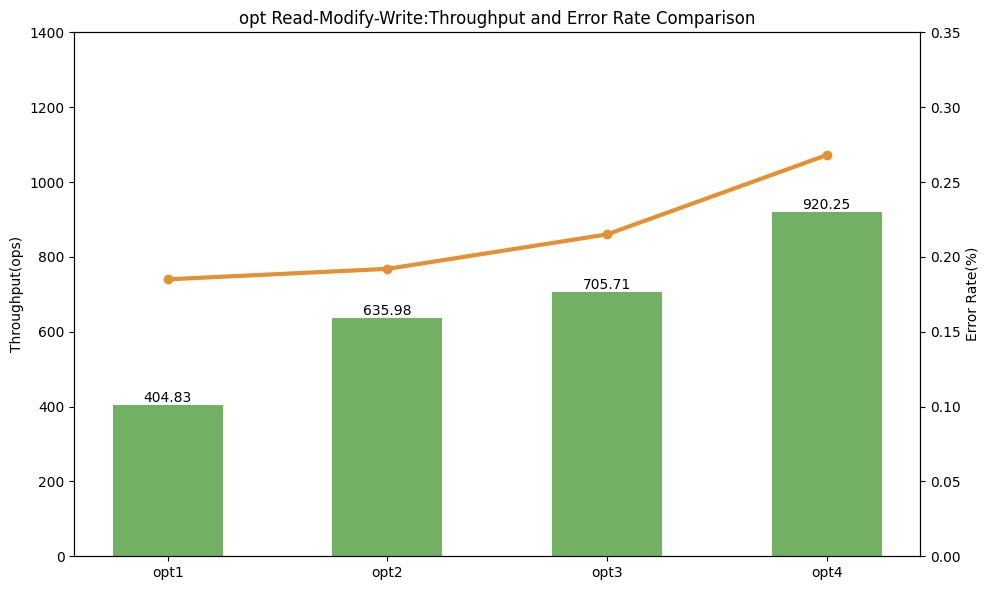

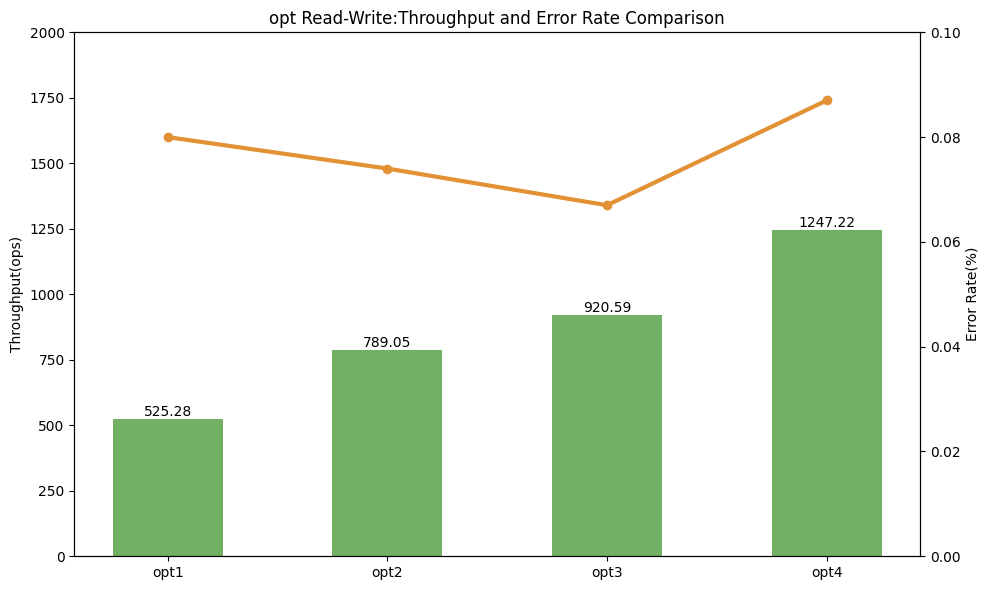

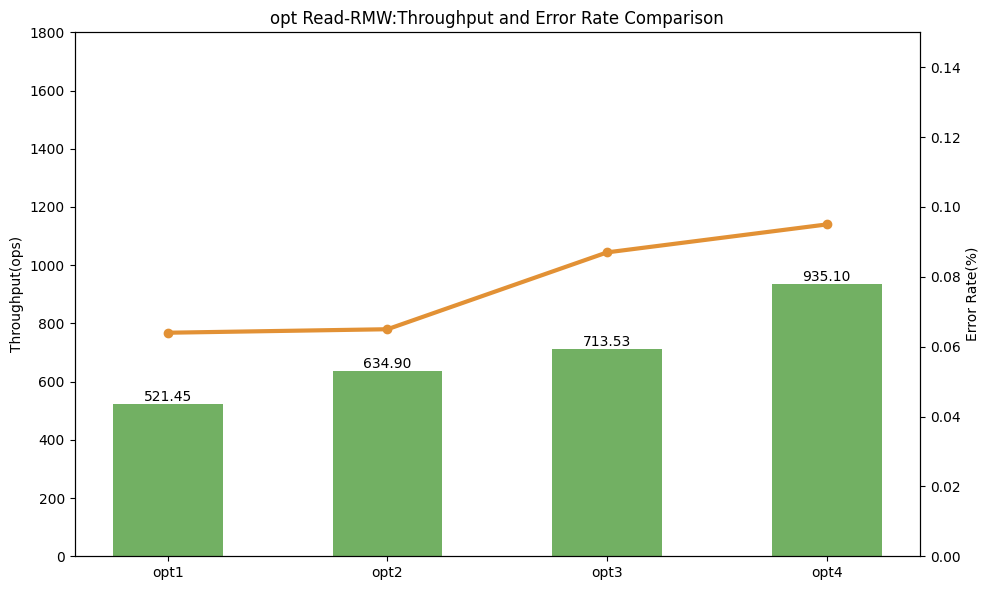

In [29]:
generate_opt_charts(opt_RMW_path, "opt Read-Modify-Write",1400,0.35)
generate_opt_charts(opt_RW_path, "opt Read-Write",2000,0.1)
generate_opt_charts(opt_RRMW_path, "opt Read-RMW",1800,0.15)

['../data/ycsb/A_MongoDB1,MongoDB2_benchmark_results.csv', '../data/ycsb/A_Redis,Cassandra_benchmark_results.csv', '../data/ycsb/F_MongoDB1,MongoDB2_benchmark_results.csv', '../data/ycsb/F_Redis,Cassandra_benchmark_results.csv']
../data/ycsb/A_MongoDB1,MongoDB2_benchmark_results.csv


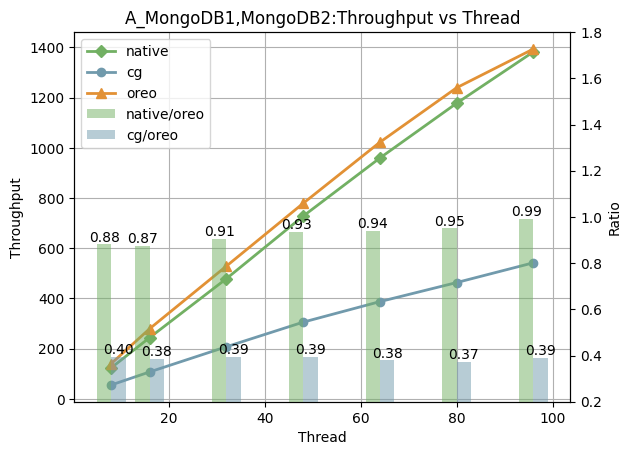

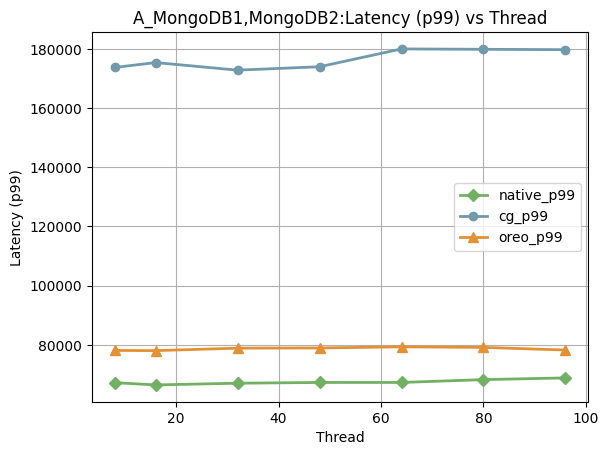

../data/ycsb/A_Redis,Cassandra_benchmark_results.csv


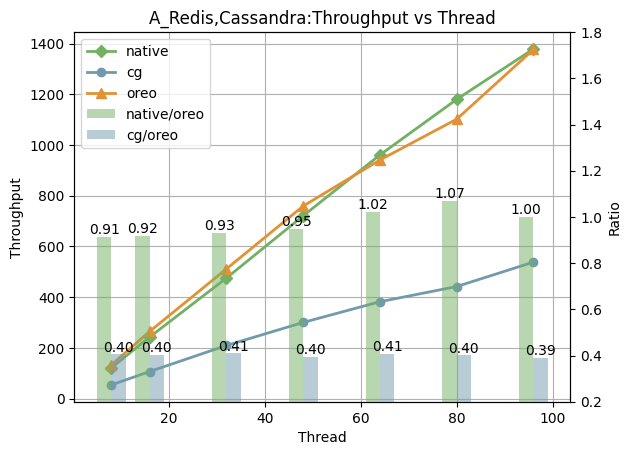

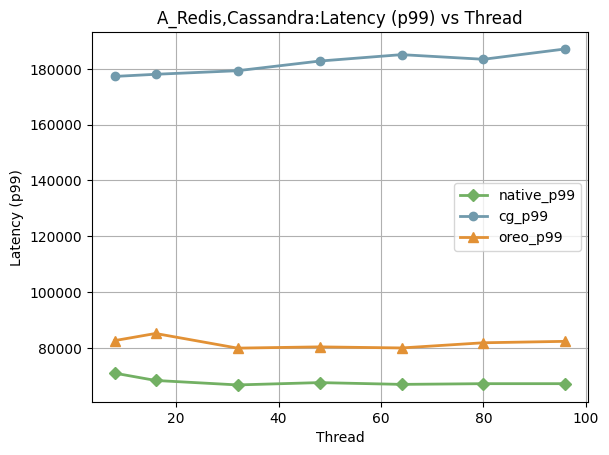

../data/ycsb/F_MongoDB1,MongoDB2_benchmark_results.csv


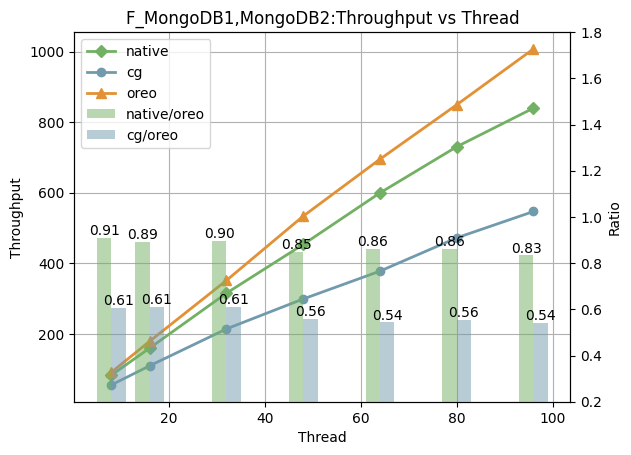

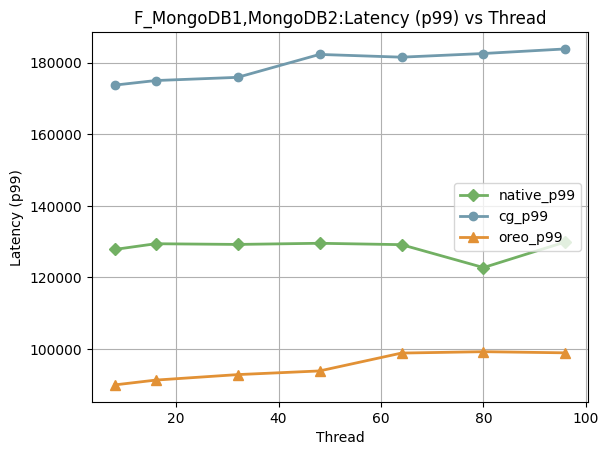

../data/ycsb/F_Redis,Cassandra_benchmark_results.csv


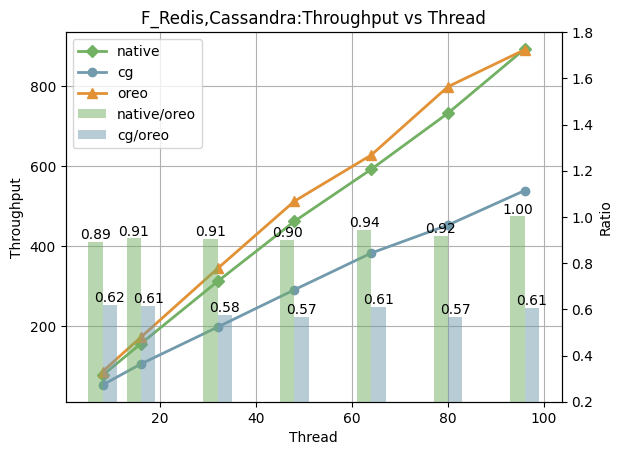

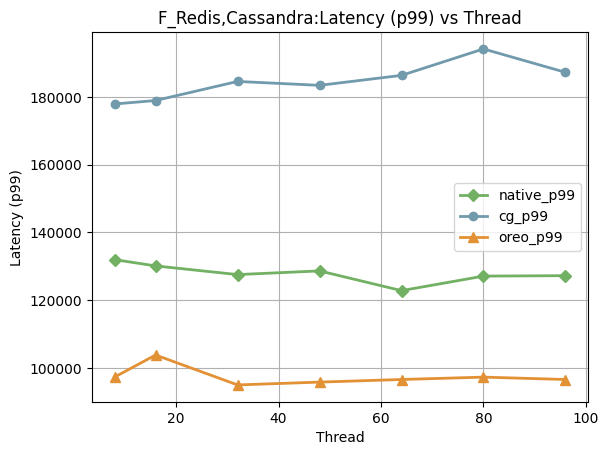

In [30]:
ycsb_paths.sort()
print(ycsb_paths)
for path in ycsb_paths:
    print(path)
    data = pd.read_csv(path)
    # 检查是否只有表头（即行数为0）
    if len(data.index) == 0:
        print(f"Skipping empty file: {path}")
        continue
    
    segment = extract_segment(path)
    generate_charts(path, segment)

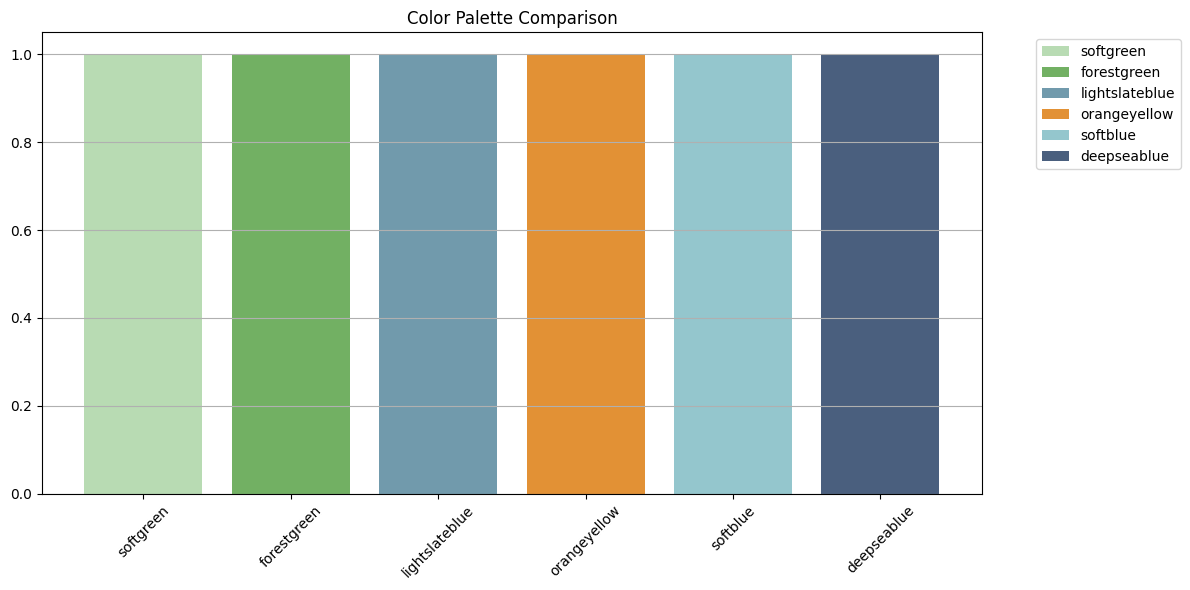

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# 定义颜色
colors = {
    "softgreen": (184 / 255, 219 / 255, 179 / 255),
    "forestgreen": (114 / 255, 176 / 255, 99 / 255),
    "lightslateblue": (113 / 255, 154 / 255, 172 / 255),
    "orangeyellow": (226 / 255, 145 / 255, 53 / 255),
    "softblue": (148 / 255, 198 / 255, 205 / 255),
    "deepseablue": (74 / 255, 95 / 255, 126 / 255),
}

# 创建图表
plt.figure(figsize=(12, 6))

# 为每种颜色创建一个矩形
for i, (name, color) in enumerate(colors.items()):
    plt.bar(i, 1, color=color, label=name)

# 设置图表属性
plt.xticks(range(len(colors)), colors.keys(), rotation=45)
plt.title("Color Palette Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, axis="y")
plt.tight_layout()

# 显示图表
plt.show()